In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [18]:
df= pd.read_csv('Datasets\Multiple_regression.csv')

In [19]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])


In [20]:
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])
df['basement'] = label_encoder.fit_transform(df['basement'])

In [21]:
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,1,0,0,0,1,2,1,2.0
1,12250000,8960,4,4,1,0,0,0,1,3,0,2.0
2,12250000,9960,3,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,1,0,1,0,1,3,1,2.0
4,11410000,7420,4,1,1,1,1,0,1,2,0,2.0


In [22]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [23]:
y = df['price']
#axis=1: This tells pandas that you want to drop columns (not rows)
x = df.drop(['price'], axis=1)
x.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,1,0,0,0,1,2,1,2.0
1,8960,4,4,1,0,0,0,1,3,0,2.0
2,9960,3,2,1,0,1,0,0,2,1,1.0
3,7500,4,2,1,0,1,0,1,3,1,2.0
4,7420,4,1,1,1,1,0,1,2,0,2.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [25]:
X_train.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,2910,3,1,0,0,0,0,0,0,0,2.0
9,5750,3,2,1,1,0,0,1,1,1,0.0
533,2400,3,1,1,0,0,0,0,0,0,0.0
274,6450,4,1,1,0,0,0,0,0,0,1.0
465,3800,2,1,1,0,0,0,0,0,0,0.0


In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.astype(int)})
df.head(5)

,Actual,Predicted
316,4060000,4945231
77,6650000,7083863
360,3710000,3243868
90,6440000,4733265
493,2800000,3763497


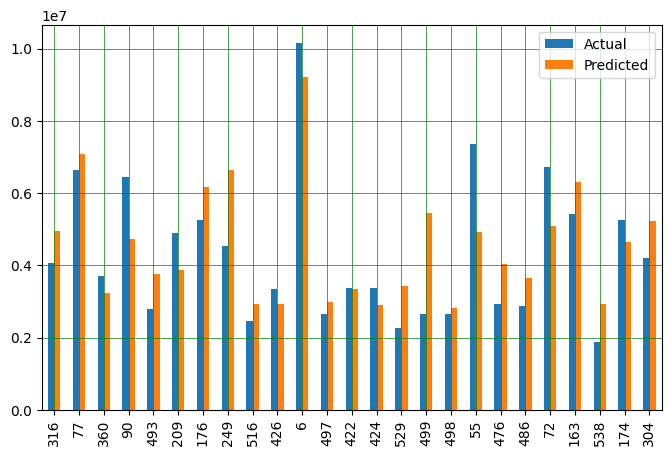

In [28]:
df_1 = df.head(25)
df_1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.6447
